<img align="left" width="500" height="500"  src="images/intromatlab.png"  >
<img align="right" width="400" height="500"  src="images/matplotlibadvantages.png"  >

## Learning agenda of this notebook
1. Recap:
    - Anatomy of a Figure
    - Line, Bar, Scatter, Pie Chart and Histogram
2. Box-plot
3. Violin plot
4. Heatmap
5. Subplots

To begin, let's install the Matplotlib library. We'll use the `matplotlib.pyplot` module for basic plots like line & bar charts. It is often imported with the alias `plt`. 

In [2]:
import sys
!{sys.executable} -m pip install matplotlib --quiet

In [3]:
import matplotlib


## 2. Boxplot
<img align="centre" width="700" height="750"  src="images/iqr2.png"  >


<br><br><br><br><br>

<img align="center" width="500" height="200"  src="images/boxplot.png"  >

Mean:  72.5
Max:  200
Min:  45
Q1:  65.75
Q2:  72.5
Q3:  81.25


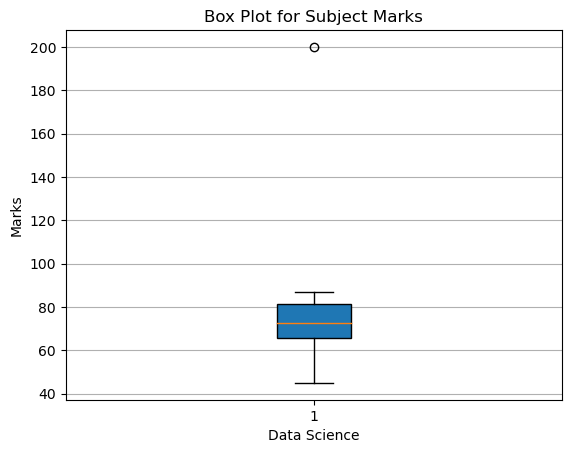

In [11]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

mks = np.array([65, 85, 72,45, 87, 68, 61, 80, 77, 73, 66, 200])
# Create figure and axes objects
fig, ax  = plt.subplots()

ax.boxplot(x=mks, patch_artist=True)

# title and axis labels
ax.set_title('Box Plot for Subject Marks')
ax.set_xlabel('Data Science')
ax.set_ylabel('Marks')

# add horizontal grid lines
ax.yaxis.grid(True)

print("Mean: ", np.median(mks))
print('Max: ', np.max(mks))
print('Min: ', np.min(mks))
q1, q2, q3 = np.quantile(mks, [.25, .5, .75])
print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)
plt.show()

In [15]:
import pandas as pd
df = pd.read_csv("datasets/boxplot.csv")
df.head()

,rollno,name,address,gender,group,session,age,scholarship,machine_learning,data_science,big_data
0,MS01,SAADIA,Lahore,female,group B,MORNING,28,2562,33,81,74
1,MS02,JUMAIMA,Islamabad,female,group C,AFTERNOON,33,2800,27,90,88
2,MS03,ARIFA,Karachi,female,group A,EVENING,34,3500,24,95,93
3,MS04,SAADIA,Lahore,female,group A,MOR,44,2000,37,57,44
4,MS05,DANISH,Peshawer,male,group C,AFTERNOON,54,2100,39,78,55


In [17]:
df.shape

(50, 11)

In [19]:
print(df.data_science.min())
print(df.data_science.max())
print(df.data_science.median())

42
95
70.0


In [20]:
# measuring quantiles for Data Science
df.data_science.quantile([.25, .5, .75])

0.25    57.25
0.50    70.00
0.75    77.25
Name: data_science, dtype: float64

In Matplotlib, `boxplot()` is the core function to create box plot. Below are some of the important parameters of the function:

- `x`: Array or a sequence of vectors. The input data.
- `vert`: Set as True or False. The default value is True, which displays the boxes vertically.
- `labels`: Sets the labels for each dataset.
- `notch`: Set as True or False. the default value is False. If True, the parameter will produce a notched box plot.
- `widths`: Sets the width of the box.
- `patch_artist`: Set as True or False. the default value is False. If False, the parameter will produce boxes with the Line2D artist. Otherwise, the boxes will be drawn with Patch artists.

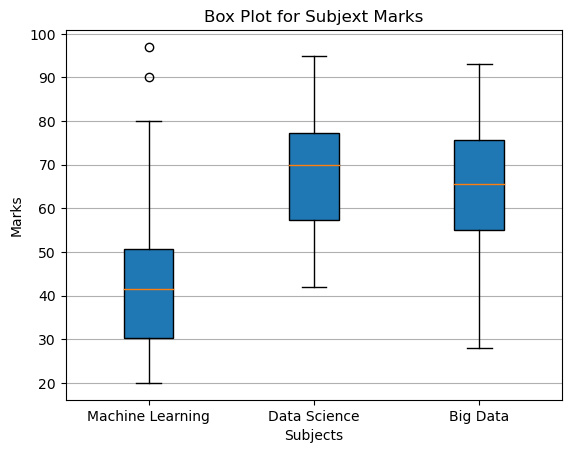

In [31]:
fig  = plt.figure()
ax = fig.add_subplot()

# Get the dataset(s)
machine_learning = list(df['machine_learning'])
data_science = list(df['data_science'])
big_data = list(df['big_data'])
values = [machine_learning, data_science, big_data]

xlabels = ['Machine Learning', 'Data Science', 'Big Data']
ax.boxplot(x=values, patch_artist=True, labels=xlabels)

ax.set_title("Box Plot for Subjext Marks")
ax.set_xlabel('Subjects')
ax.set_ylabel('Marks')

ax.yaxis.grid(True)
plt.show()

## 3. Violin Plot
Violin plots are similar to box plots, except that they also show the probability density of the data at different values. These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots.

A violin plot is more informative than a plain box plot. In fact while a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

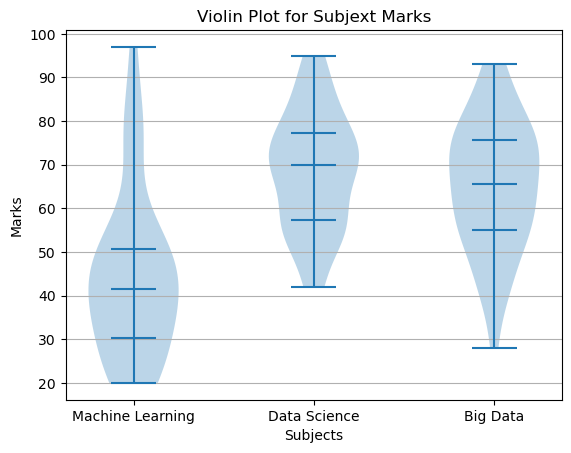

In [36]:
fig = plt.figure()
ax = fig.add_subplot()

# Get the dataset(s)
machine_learning = list(df['machine_learning'])
data_science = list(df['data_science'])
big_data = list(df['big_data'])
values = [machine_learning, data_science, big_data]

xlabels=["Machine Learning", "Data Science", "Big Data"]
quantiles = [[0.25, 0.75], [0.25, 0.75], [0.25, 0.75]]
ax.violinplot(dataset=values, showmedians=True, quantiles=quantiles)

# titles and axis labels
ax.set_title('Violin Plot for Subjext Marks')
ax.set_xlabel('Subjects')
ax.set_ylabel('Marks')

ax.set_xticks([1,2,3])
ax.set_xticklabels(xlabels)

ax.yaxis.grid(True)
plt.show()

## 4. Heat Map
Heat map Heat map is used to find out the correlation between different features in the dataset.High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.
>- A heatmap is a useful chart that we can use to show the relationship between two variables. 
>- A heatmap is used to visualize 2-dimensional data like a matrix or a table using colors.

In [37]:
import numpy as np
data_set = np.random.randint(0, 255, 250000).reshape(500,500)
data_set

array([[207,  10, 193, ..., 103, 182, 101],
       [ 90, 209, 200, ..., 158,  92,  16],
       [162, 159,  10, ...,  87,  45, 106],
       ...,
       [179,  12, 254, ..., 218, 239, 186],
       [186, 246,   4, ...,  78,  10, 217],
       [215, 175, 202, ...,  19, 117, 125]])

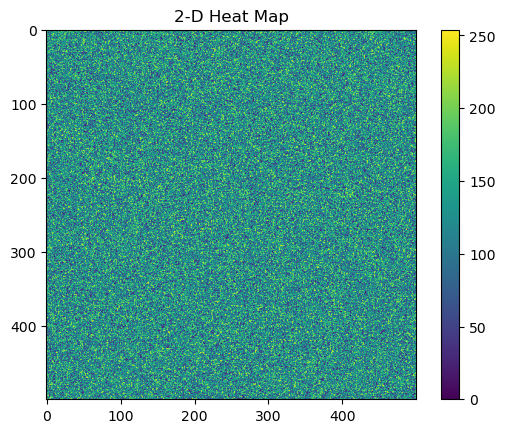

In [40]:
plt.imshow(X=data_set)
plt.colorbar()
plt.title("2-D Heat Map")
plt.show()

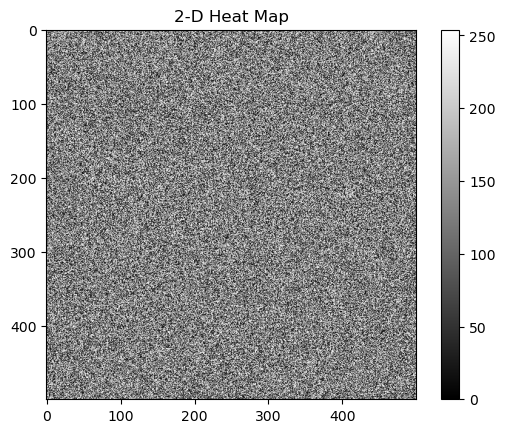

In [45]:
plt.imshow(X=data_set, cmap='gray')
plt.colorbar()
plt.title("2-D Heat Map")
plt.show()

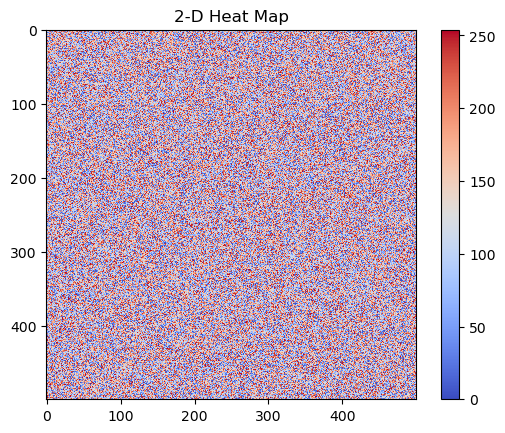

In [49]:
plt.imshow(X=data_set, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title( "2-D Heat Map" )
plt.show()

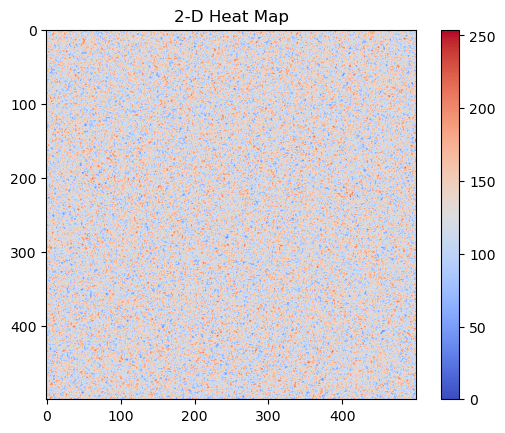

In [50]:
plt.imshow(X=data_set, cmap='coolwarm', interpolation='bicubic')
plt.colorbar()
plt.title("2-D Heat Map")
plt.show()

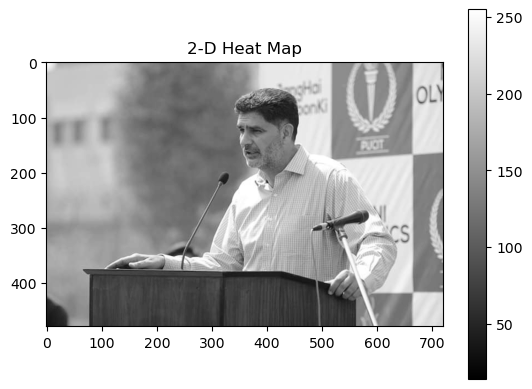

In [55]:
from PIL import Image
rgb_img = Image.open('datasets/speech.jpg')
grey_img = rgb_img.convert('L')
rgb_img_array = np.array(grey_img)

plt.imshow(X=rgb_img_array, cmap='gray')
plt.colorbar()
plt.title("2-D Heat Map")
# grey_img.shape
plt.show()

## 5. Creating Multiple Plots (Sub-Plots) within a Figure
- A single matplotlib figure object may contain multiple subplots (axes objects) organized in a grid. You can use any of the three ways to do it:
    - `plt.subplot()`
    - `fig.add_subplot()`
    - `plt.subplots()`
- The best option is use the `plt.subplots()` method, and specify the number of rows and columns as shown below:
```
fig, <ax objects> = plt.subplots(rows, cols)
```
- Where rows and cols are integers that control the subplot layout. The `<ax objects>` needs to have dimensions that correspond to rows and cols.
- Since `plt.subplots()` method unlike the other two methods return an array of axes, so you can access different axes objects using following two ways:
    - You receive all the axes objects in one variable and later treat it as an array. In this case the first row has an index of zero and the first column has an index of one.
    - Other option is you receive all the axes objects in tuples with one tuple for each row in the grid.
    The index of the subplot you want to draw on, starts from 1, then left to right, and top to bottom
- **Note** that pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()`), so when you call the `plot` function, it draws on the *active* subplot.

    
    
If a 2 row by 2 column array of plots is created, the <ax object> must to be arrayed as shown below:
 
```
fig, ( (ax1,ax2), (ax3,ax4) ) = plt.subplots(2,2)
```
    
If a 2 row by 3 column array of plots is created, the <ax objects> must be arrayed to correspond to these dimensions:
```
fig, ( (ax1,ax2,a3), (ax4,ax5,ax6) ) = plt.subplots(2, 3)   
```


**Option 1: `plt.subplot()`**

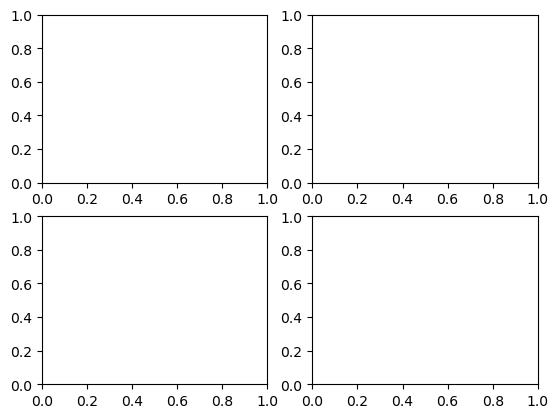

In [69]:
# The third argument of the `plt.subplot()` method mentions the specific axes object to create in the grid
# It starts from 1, then left to right, and top to bottom

fig = plt.figure()
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

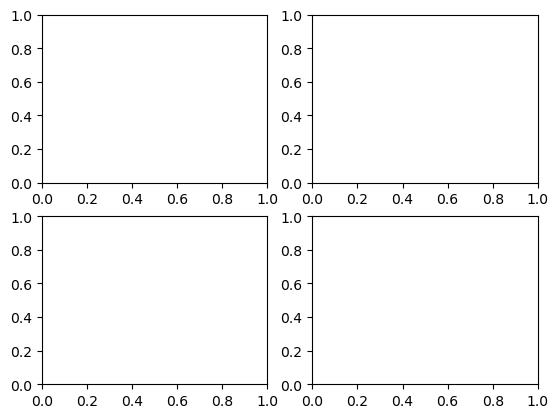

In [59]:
# The third argument of the `fig.add_subplot()` method mentions the specific axes object to create in the grid
# It starts from 1, then left to right, and top to bottom
fig = plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

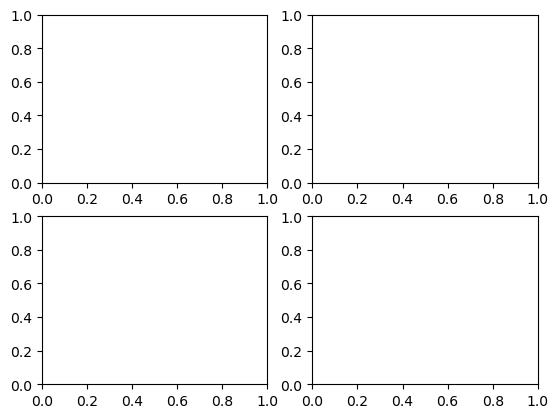

In [71]:
# There is no third argument to `plt.subplots()` method, as it creates all axes objects in just one line
# and return all the axes objects which you can receive in either an array or tupples
fig,ax = plt.subplots(2,2)
#Now you can access the subplots using subscript operator e.g., ax[0][0], ax[0][1], ax[1][0], and ax[1][1]

>**We will be using the `plt.subplots()` method to create subplots**

>**So lets do a bit of more practice**

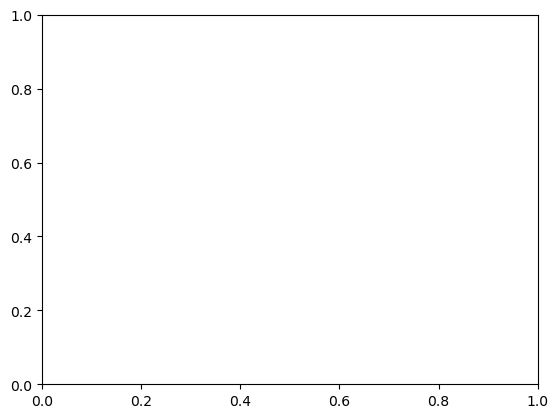

In [72]:
fig, ax = plt.subplots()

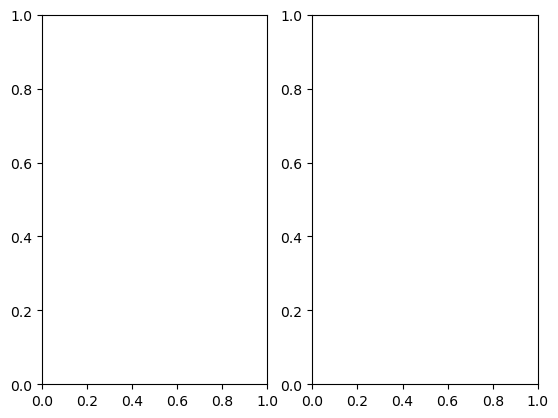

In [73]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

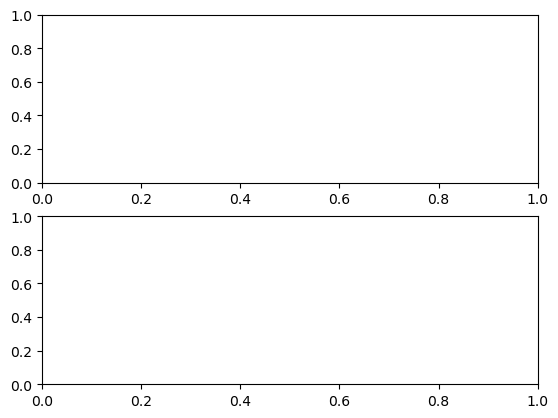

In [74]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)

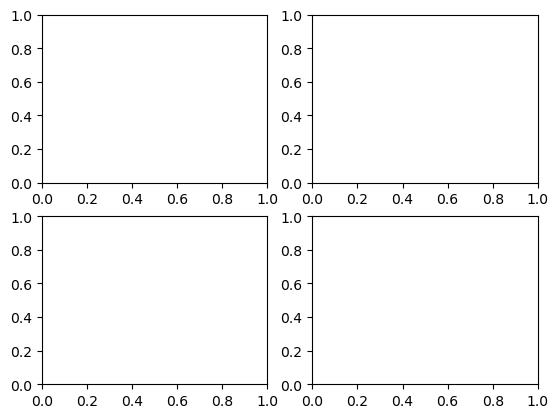

In [75]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

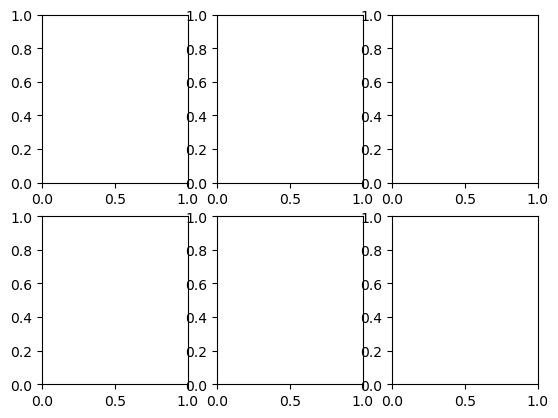

In [76]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2,3)

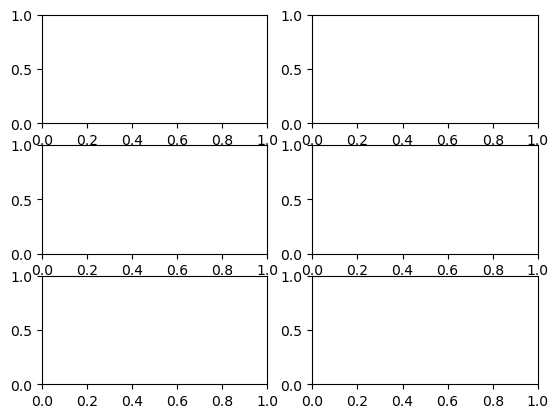

In [78]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2)

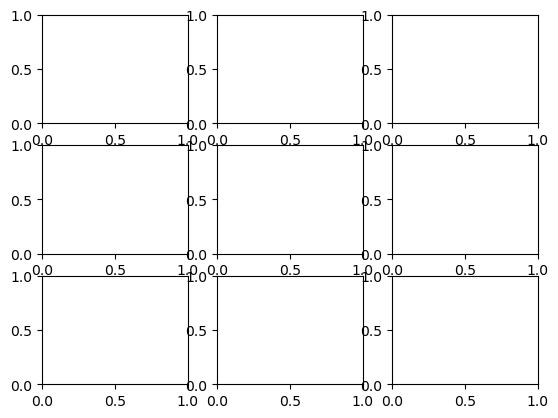

In [79]:
# Another way is to receive all the axes in a single variable and later use it as an array of axes
fig, ax = plt.subplots(3,3)

>- In above grid, `ax[0][2]` will represent the right most axes in the zeroth row
>- In above grid, `ax[1][1]` will represent the middle axes object in below grid

**Example 1:**

In [80]:
x = np.linspace(-1, 1, 30)
x

array([-1.        , -0.93103448, -0.86206897, -0.79310345, -0.72413793,
       -0.65517241, -0.5862069 , -0.51724138, -0.44827586, -0.37931034,
       -0.31034483, -0.24137931, -0.17241379, -0.10344828, -0.03448276,
        0.03448276,  0.10344828,  0.17241379,  0.24137931,  0.31034483,
        0.37931034,  0.44827586,  0.51724138,  0.5862069 ,  0.65517241,
        0.72413793,  0.79310345,  0.86206897,  0.93103448,  1.        ])

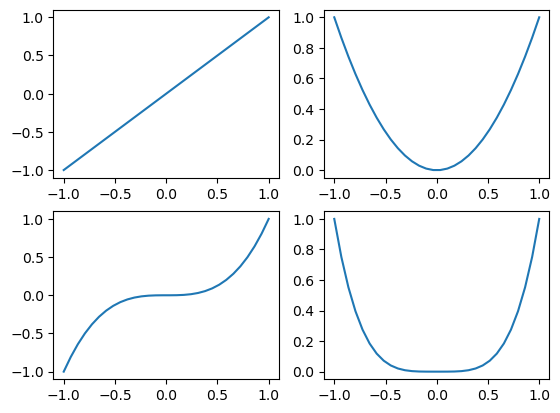

In [86]:
x = np.linspace(-1, 1, 30)

fig,((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2)

ax1.plot(x,x)
ax2.plot(x, x**2)
ax3.plot(x, x**3)
ax4.plot(x, x**4)
plt.show()

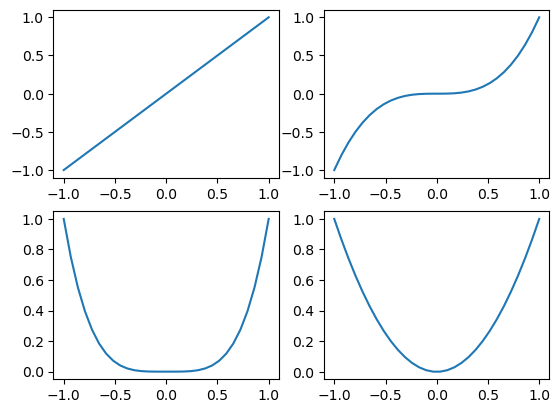

In [92]:
x = np.linspace(-1, 1, 30)

fig, ax = plt.subplots(2, 2)
ax[0][0].plot(x,x)
ax[1][1].plot(x, x**2)
ax[0][1].plot(x,x**3)
ax[1][0].plot(x,x**4)
plt.show()

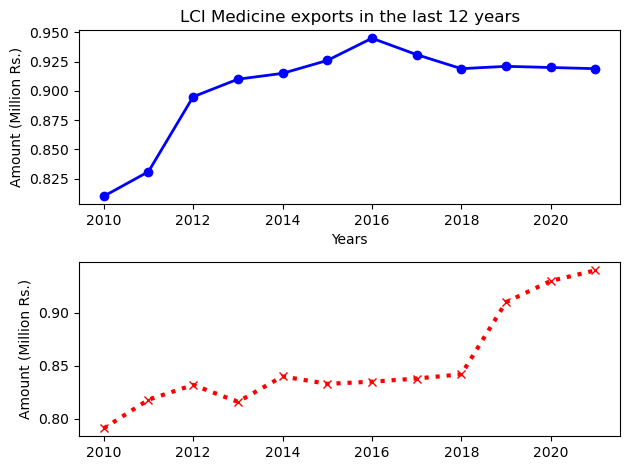

In [106]:
chemical_exports = [0.810, 0.831, 0.895, 0.91, 0.915, 0.926, 0.945, 0.931, 0.919, 0.921, 0.920, 0.919]
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
medicine_exports = [0.791, 0.818, 0.832, 0.816, 0.840, 0.833, 0.835, 0.838, 0.842, 0.910, 0.930, 0.940]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(years, chemical_exports, label='Chemicals', marker='o', c='b', ls='-', lw=2)
ax2.plot(years, medicine_exports, label='Medicines', marker='x', c='r', ls=':', lw=3)

# Note the use of set
ax1.set_title("LCI Chemicals exports in last 12 years")
ax1.set_xlabel("Years")
ax1.set_ylabel("Amount (Million Rs.)")

ax1.set_title("LCI Medicine exports in the last 12 years")
ax1.set_xlabel('Years')
ax2.set_ylabel("Amount (Million Rs.)")

plt.tight_layout()
plt.show()

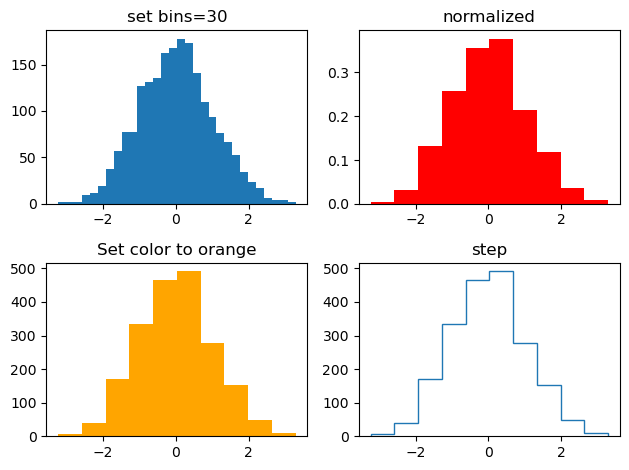

In [117]:
# geerating random values withing range from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.
data = np.random.randn(2000)

fig, ax = plt.subplots(nrows=2, ncols=2)
# use axes object to plot histograms in subplots, for example plot histrogram on 0th row, 0th column
ax[0][0].hist(data, bins=30)
ax[0][0].set_title("set bins=30")

# plot histrogram on 0th row, 1st column, by setting density to true which normalized the histogram
ax[0][1].hist(data, density=True, color='r')
ax[0][1].set_title("normalized")

# plot histrogram on 1st row, 0th column,
ax[1][0].hist(data, color='orange')
ax[1][0].set_title("Set color to orange")

# plot histrogram on 1st row, 1st column, by setting histogram type as step
ax[1][1].hist(data, histtype='step')
ax[1][1].set_title("step")

plt.tight_layout()
plt.show()

In [124]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# import iris dataset and display in dataframe
df_iris = sns.load_dataset('iris')

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=100)


# draw line plot on iris data (between dataframe index and sepal_length column)
axes[0][0].plot(df_iris.index, df_iris['sepal_length'], color='r')
axes[0][0].grid(True)
axes[0][0].set_facecolor('#FAEBD7')


# draw bar-plot on iris data (between dataframe index and sepal_length column)
axes[0][1].bar(df_iris.index, df_iris['sepal_length'])


# draw scatter-plot on iris data (between sepal_length and sepal_width column)
axes[1][0].scatter(df_iris['sepal_width'], df_iris['sepal_length'], color='orange')
axes[1][0].grid(True)
axes[1][0].set_facecolor('#BDEFE9')


# draw histogram-plot on iris data (on sepal_length column)
axes[1][1].hist(df_iris['sepal_length'], bins=20, density=True, histtype='bar', alpha=0.3, 
                color='green', edgecolor='black')
axes[1][1].grid(True)
plt.show()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# import iris dataset and display in dataframe
df_iris = sns.load_dataset('iris')

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=100)


# draw line plot on iris data (between dataframe index and sepal_length column)
axes[0][0].plot(df_iris.index, df_iris['sepal_length'], color='r')
axes[0][0].grid(True)


# draw bar-plot on iris data (between dataframe index and sepal_length column)
axes[0][1].bar(df_iris.index, df_iris['sepal_length'])


# draw scatter-plot on iris data (between sepal_length and sepal_width column)
axes[1][0].scatter(df_iris['sepal_width'], df_iris['sepal_length'], color='orange')
axes[1][0].grid(True)


# draw histogram-plot on iris data (on sepal_length column)
axes[1][1].hist(df_iris['sepal_length'], bins=20, density=True, histtype='bar', alpha=0.3, 
                color='green', edgecolor='black')
plt.show()